# Forecast Exchange Rates

<b>What is exchange rate?</b><br>
International currency exchange rates display how much one unit of a currency can be exchanged for another currency. Currency exchange rates can be floating, in which case they change continually based on a multitude of factors, or they can be pegged (or fixed) to another currency, in which case they still float, but they move in tandem with the currency to which they are pegged.

<b>Why knwoing the exchange value is important?</b><br>
Knowing the value of a home currency in relation to different foreign currencies helps investors to analyze assets priced in foreign dollars. For example, for a U.S. investor, knowing the dollar to euro exchange rate is valuable when selecting European investments. A declining U.S. dollar could increase the value of foreign investments just as an increasing U.S. dollar value could hurt the value of your foreign investments. 

<b>Why exchange rate fluctuate</b><br>
Most of the world's currencies are bought and sold based on flexible exchange rates, meaning their prices fluctuate based on the supply and demand in the foreign exchange market. A high demand for a currency or a shortage in its supply will cause an increase in price. A currency's supply and demand are tied to a number of intertwined factors including the country's monetary policy, the rate of inflation, and political and economic conditions.

### Importing Libraries

In [54]:
#VIZ AND DATA MANIPULATION LIBRARY
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

#plotly
from plotly import tools
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#datetime
import datetime as dt

#warnings
import warnings 
warnings.filterwarnings('ignore')

#Statsmodel
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

### Loading Data

If a column or index cannot be represented as an array of datetimes, say because of an unparseable value or a mixture of timezones,To parse an index or column with a mixture of timezones, specify "parse_date" to be a partially-applied

In [55]:
inrusd = pd.read_csv('https://raw.githubusercontent.com/PawanKatwe/ExcelR_project/main/Dataset.csv',parse_dates=["observation_date"])
inrusd.head()

,observation_date,DEXINUS
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [56]:
#Copy Data
df = inrusd.copy()
df.head()

,observation_date,DEXINUS
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [57]:
#shape
df.shape

(12649, 2)

In [58]:
#renaming the date and rate column
data = df[['observation_date', 'DEXINUS']]
data.columns = ['date', 'rate']

In [59]:
data.head()

,date,rate
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [60]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12649 entries, 0 to 12648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    12649 non-null  datetime64[ns]
 1   rate    12155 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 197.8 KB


In [61]:
#to numeric
data['rate'] = pd.to_numeric(data.rate)

In [62]:
#sort values by date
data = data.sort_values('date', ascending=True)

In [63]:
#show basic stats
data.rate.describe()

count    12155.000000
mean        34.206133
std         21.089190
min          7.190000
25%         12.075000
50%         35.890000
75%         47.650000
max         76.950000
Name: rate, dtype: float64

In [64]:
#Checking null values
data.isnull().sum()

date      0
rate    494
dtype: int64

In [65]:
#usd.query('DEXINUS != DEXINUS')

There are tota 494 null values in the data

In [66]:
#filling null values
#Method = Forward Filling
data.fillna(method='ffill', inplace=True)

In [67]:
#checking Null values again
data.isnull().sum()

date    0
rate    0
dtype: int64

Convert datatype int to float

In [68]:
#transformation of values to float
data['rate'] = pd.to_numeric(data['rate'], downcast="float")

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12649 entries, 0 to 12648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    12649 non-null  datetime64[ns]
 1   rate    12649 non-null  float32       
dtypes: datetime64[ns](1), float32(1)
memory usage: 247.1 KB


In [70]:
#Checking Duplocaties
data.duplicated().sum()

0

### Visualization

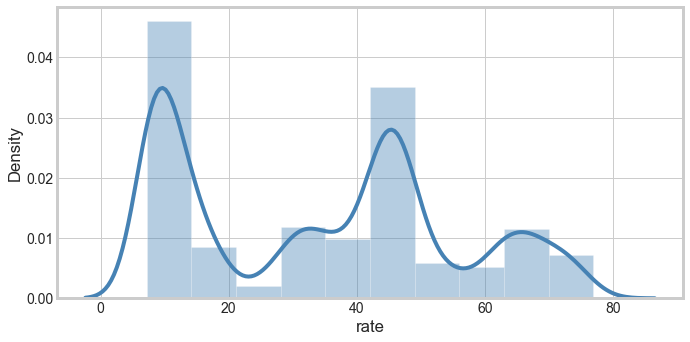

In [73]:
#Data Distribution
plt.figure(figsize=(10,5))
sns.distplot(data.rate, bins=10, color='steelblue');
plt.show()

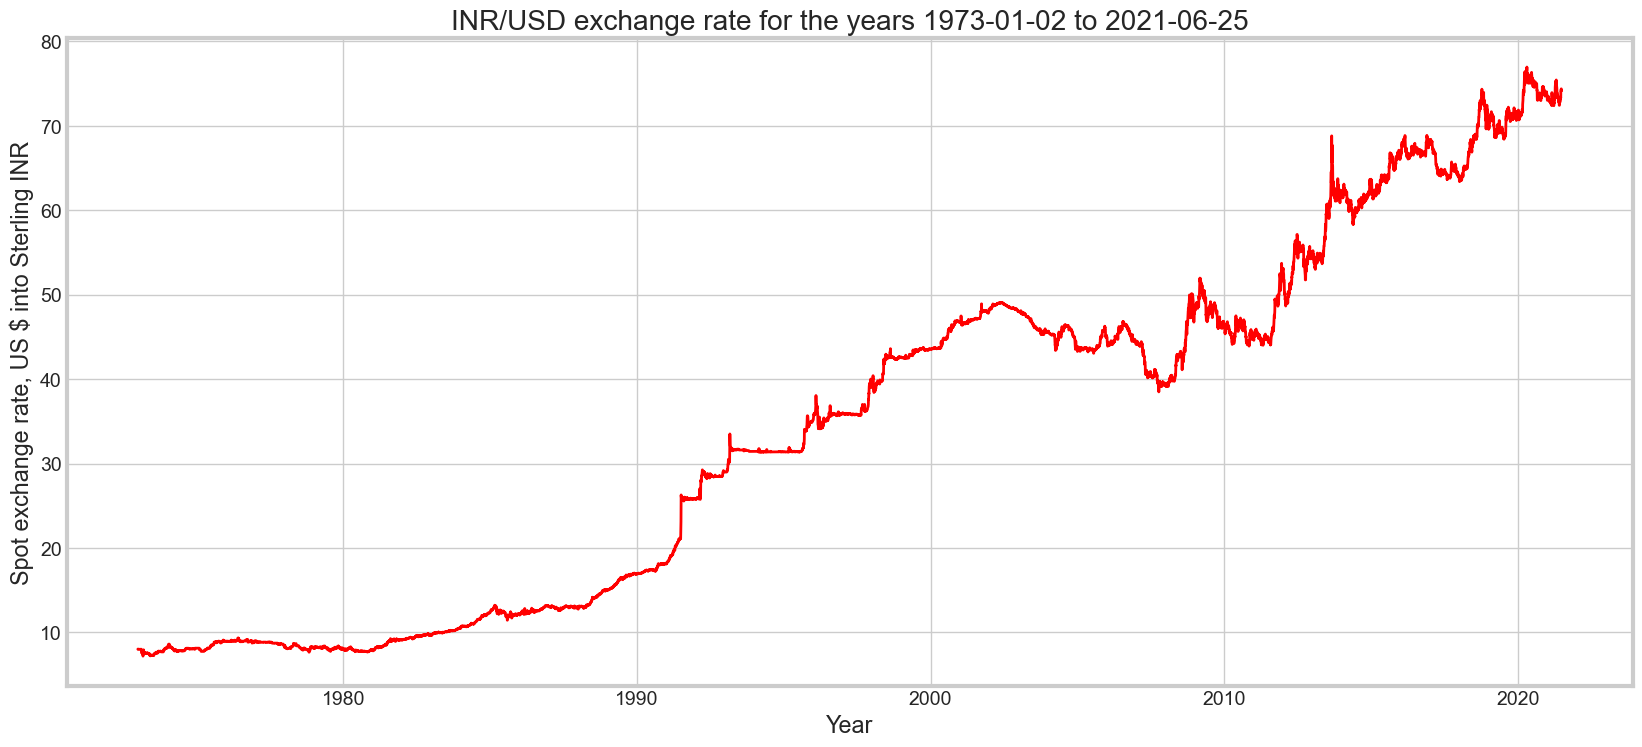

In [74]:
#Line Plot
plt.figure(figsize =(18,8),dpi=100)
sns.lineplot(data=data,x=data.date, y=data.rate,color='red', linewidth = 2)
plt.ylabel('Spot exchange rate, US \$ into Sterling INR')
plt.xlabel('Year')
plt.title('INR/USD exchange rate for the years 1973-01-02 to 2021-06-25')
plt.show()

In [75]:
#interactive lineplot with plotly 

import plotly.express as px

fig = px.line(data, x = 'date', y='rate', title ='India-US exchange rate' )

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=5, label="5y", step="year", stepmode="backward"),
            dict(count=15, label="15y", step="year", stepmode="backward"),
            dict(step="all"),
        ])
    )
)
fig.show()

<b>Ecnomic Events</b>
<h5>Rupee Devaluation, its Causes and Impact on Indian Economy</h5>

<p> Devaluation means reduction in the value of currency with respect to goods, services or other monetary units with which that currency can be changed. For example suppose the exchange rate between rupee and dollar is Rs 50 = 1 USD. If this exchange rate is fixed Rs 55 = 1$then it is called the devaluation of rupee. This is a monetary policy tool used by countries that have a fixed exchange rate or semi fixed exchange rate. A country may devaluate its currency is to combat trade balances. It means the exports are less expensive and more competitive in the global market and the imports are more expensive so that the people use the domestic products.

Devaluation is a term which is different from depreciation because the value of rupee is decreased by change in the demand and supply of currency. But devaluation is done by government to improve the balance of payment. </p>
<P>The devaluation of Indian currency has positive and negative impact on Indian economy. Devaluation means officially lowering the value of currency in terms of foreign exchange. The devaluation of currency is done by government. The rupee is devalued first in 1966 by 57% from Rs. 4.76 to 7.50 against US dollar. In the year 1991, the rupee was again devalued by 19.5% from Rs.20.5 to Rs.24.5 against the US dollar. In this paper, an attempt is made to review the probable reasons for the devaluation of the rupee and analyses the impact of currency devaluation on the various sector of the country. For this required data is collected from various Journals and websites. Pros and cons of currency devaluation are studied as boon and bane for the economic growth.</P><br>
<h5>Global Economic Crises</h5>
<p>The rupee touched a high of Rs 39 to the dollar in 2007 but the global economic crisis of 2008 put a stop to the rally. By end 2008, the currency had hit a fresh low of Rs 51. Then, in 2012, the government's budget conditions worsened due to spill-over effects of the Greece-Spain sovereign debt crisis, and the rupee fell further to Rs 56.

Factors ranging from volatile oil prices to vacillating foreign inflows, from global economic concerns to domestic issues like rising inflation have continuously rained on the rupee's parade ever since. Turkey's ongoing financial turmoil is just the latest factor weighing it down.</p>



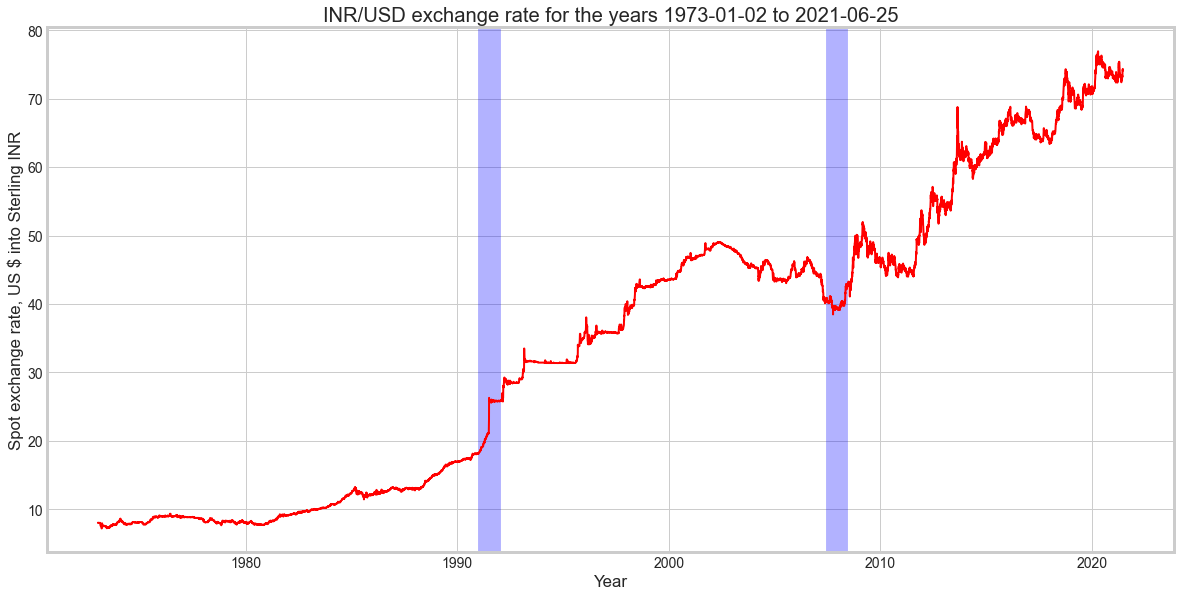

In [76]:
#import seaborn as sns

#from datetime import datetime
fig, ax = plt.subplots(figsize=(18,9))
sns.lineplot(data=inrusd,x=inrusd.observation_date, y=inrusd.DEXINUS,color='red', linewidth = 2)
ax.axvspan(date2num(dt.datetime(1991,1,1)), date2num(dt.datetime(1992,1,1)), color="blue", alpha=0.3)
ax.axvspan(date2num(dt.datetime(2007,6,1)), date2num(dt.datetime(2008,6,1)), color="blue", alpha=0.3)
plt.ylabel('Spot exchange rate, US \$ into Sterling INR')
plt.xlabel('Year')
plt.title('INR/USD exchange rate for the years 1973-01-02 to 2021-06-25')
plt.show()

In [77]:
#PCF AND APCF

In [78]:
from pandas.plotting import lag_plot

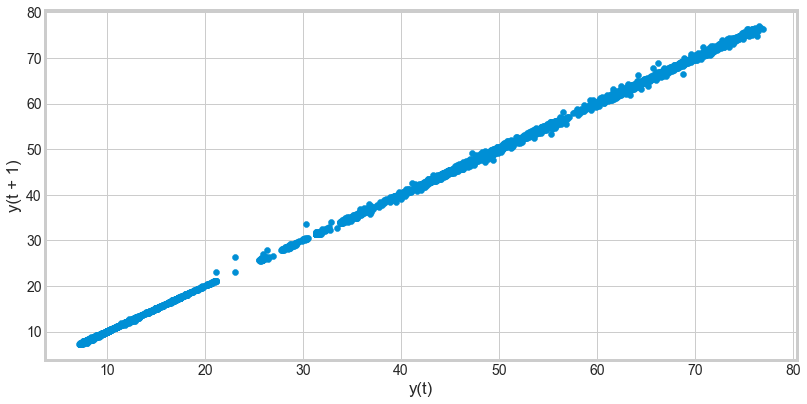

In [79]:
plt.subplots(figsize=(12,6))
lag_plot(data['rate'])

In [80]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

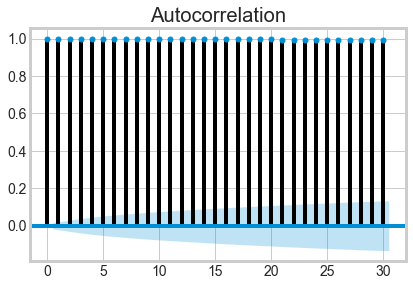

In [81]:
plot_acf(data.rate,lags=30);

<h4><b>Checking the stationarity of data</b></h4>
<h5> 1 Summary statistics</h5>


In [82]:
#spliting data in two part to compare mean and variance

x = data.rate.values
split = round(len(x)/2)
x1,x2 = x[0:split],x[split:]
mean1,mean2 = x1.mean(),x2.mean()
var1,var2 = x1.var(),x2.var()

print("mean1 = ",mean1,"  mean2 = ",mean2 )
print("var1 = ",var1,"    var2 = ",var2)

#also comparing with global mean and variance.

print("Glabal meaan = ", x.mean(), " Global variance = ", x.var())


mean1 =  15.734202   mean2 =  52.6771
var1 =  86.58933     var2 =  122.49267
Glabal meaan =  34.207115  Global variance =  445.73682


<h6><b>As the mean and variance is changing overtime data is non-stationary</b><h6>

<h5>2 Augmented Dickey Fuller Test (ADF Test) </h5>

In [83]:

# null hypothesis is data is non-staionary 
#he p-value obtained should be less than the significance level (say 0.05) in order to 
#reject the null hypothesis. Thereby, inferring that the series is stationary.

from statsmodels.tsa.stattools import adfuller

result= adfuller(x, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: 0.6320005031452571
n_lags: 0.9883783941826947
p-value: 0.9883783941826947
Critial Values:
   1%, -3.4308686449575485
Critial Values:
   5%, -2.8617692154460714
Critial Values:
   10%, -2.56689200640251


The p-value is obtained is greater than significance level of 0.05 and the ADF statistic is higher than any of the critical values.

Clearly, We have to reject the null hypothesis. So, the time series is  non-stationary.

<h3>From both the test we came to conclusiotn that data is non-stationary</h3>

In [84]:
#last 10 year data


In [85]:
data2 = data.set_index('date')

In [86]:
ten_year = data2["2011-1-1":"2021-06-25"]

In [87]:

result_ten = adfuller((ten_year.rate.values), autolag='AIC')
print(f'ADF Statistic: {result_ten[0]}')
print(f'n_lags: {result_ten[1]}')
print(f'p-value: {result_ten[1]}')
for key, value in result_ten[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -1.7592381339394576
n_lags: 0.4008782357358417
p-value: 0.4008782357358417
Critial Values:
   1%, -3.4327484835605944
Critial Values:
   5%, -2.862599676387103
Critial Values:
   10%, -2.567334100151985


The p-value is obtained is greater than significance level of 0.05 and the ADF statistic is higher than any of the critical values hence data is non stationary

In [88]:
#last 5 year data
five_year = data2["2016-1-1":"2021-06-25"]

result_five = adfuller((five_year.rate.values), autolag='AIC')
print(f'ADF Statistic: {result_five[0]}')
print(f'n_lags: {result_five[1]}')
print(f'p-value: {result_five[1]}')
for key, value in result_five[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -1.1018264544216019
n_lags: 0.7143429868738917
p-value: 0.7143429868738917
Critial Values:
   1%, -3.434931172941245
Critial Values:
   5%, -2.8635632730206857
Critial Values:
   10%, -2.567847177857108


The p-value is obtained is greater than significance level of 0.05 and the ADF statistic is higher than any of the critical values hence data is non stationary

In [89]:
#last 1 year data
one_year = data2["2020-06-25":"2021-06-25"]

result_one = adfuller((one_year.rate.values), autolag='AIC')
print(f'ADF Statistic: {result_one[0]}')
print(f'n_lags: {result_one[1]}')
print(f'p-value: {result_one[1]}')
for key, value in result_one[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -2.877123341719373
n_lags: 0.04807364825278431
p-value: 0.04807364825278431
Critial Values:
   1%, -3.4556556713934934
Critial Values:
   5%, -2.872678352489859
Critial Values:
   10%, -2.57270548832225


The p-value is obtained is less than significance level of 0.05 and the ADF statistic is lower than any of the critical values hence data of last on year is stationary

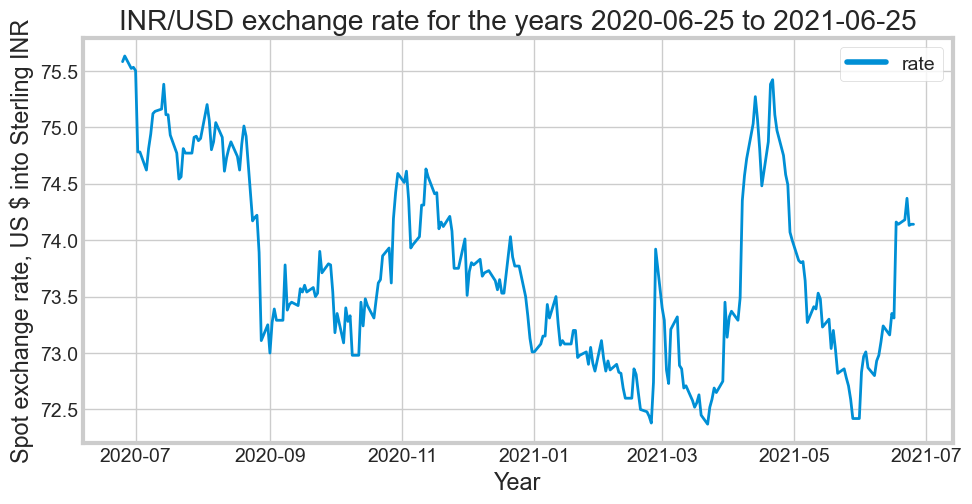

In [92]:
#line plot for last one year

plt.figure(figsize =(10,5),dpi=100)
sns.lineplot(data=one_year,color='red', linewidth = 2)
plt.ylabel('Spot exchange rate, US \$ into Sterling INR')
plt.xlabel('Year')
plt.title('INR/USD exchange rate for the years 2020-06-25 to 2021-06-25')
plt.show()

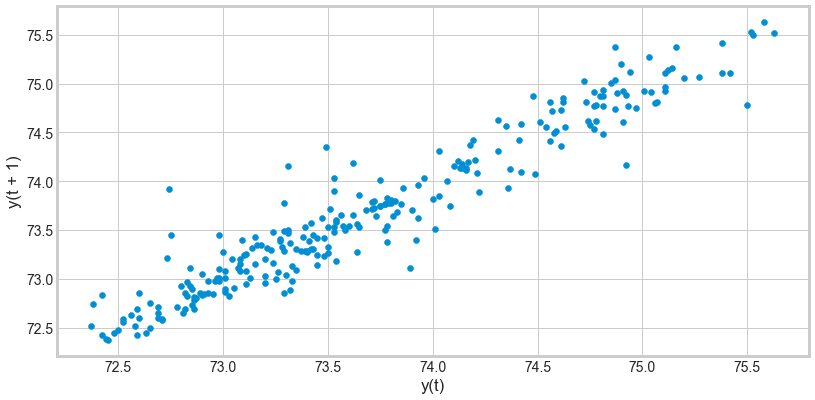

In [43]:
#lag plot for last one year

plt.subplots(figsize=(12,6))
lag_plot(one_year['rate'])

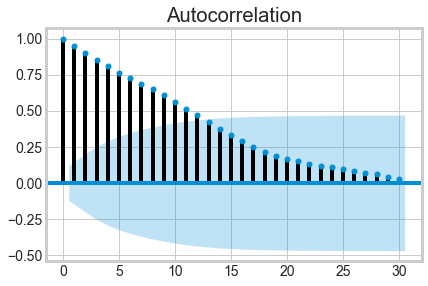

In [99]:
#ACF plot for last one year data

plot_acf(one_year.rate,lags=30);

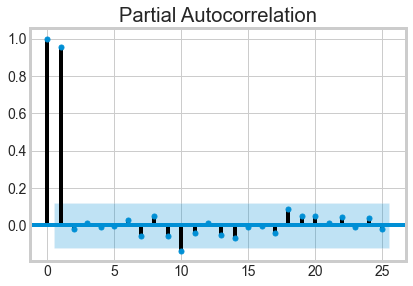

In [96]:
#PACF plot for last one year data

plot_pacf(one_year.rate);

<h4>Which model to be select as per acf and pacf plot

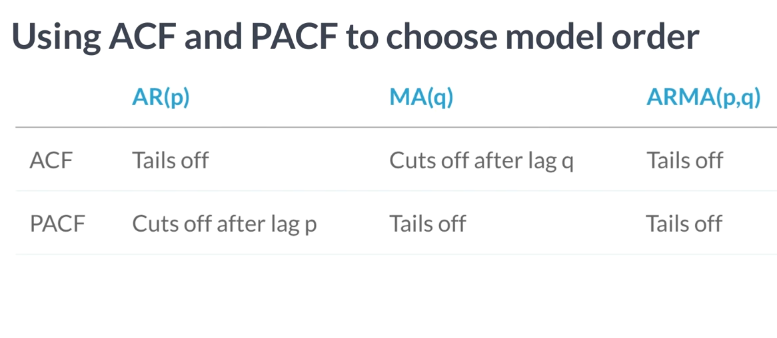